In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_img():
    blank_image = np.zeros((600, 600))
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(
        blank_image,
        text='ABCDE',
        org=(50, 300),
        fontFace=font_face,
        fontScale=5,
        color=(255, 255, 255),
        thickness=30
    )
    
    return blank_image

In [4]:
def display_img(image):
    figure = plt.figure(figsize=(12, 10))
    ax = figure.add_subplot(111)
    ax.imshow(image, cmap = 'gray')

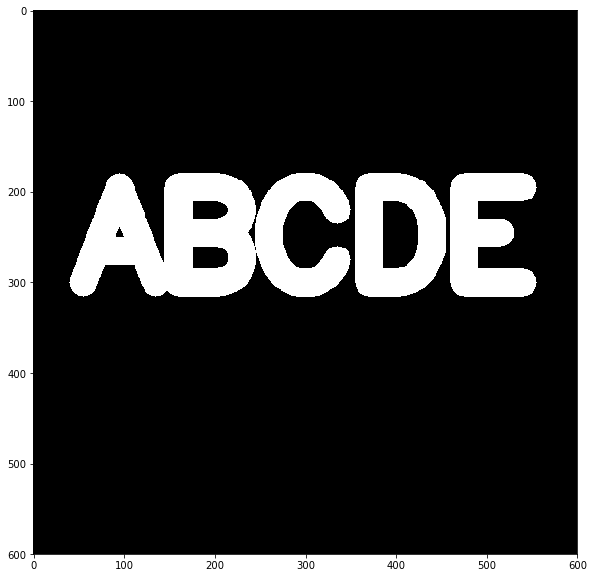

In [5]:
image = load_img()
display_img(image)

In [6]:
####################
## Erosion Effect ##
####################

In [7]:
image_kernel = np.ones((5, 5), dtype = np.uint8)
print(image_kernel.shape, image_kernel)

(5, 5) [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [8]:
kerneled_image = cv2.erode(image, image_kernel, iterations=4)

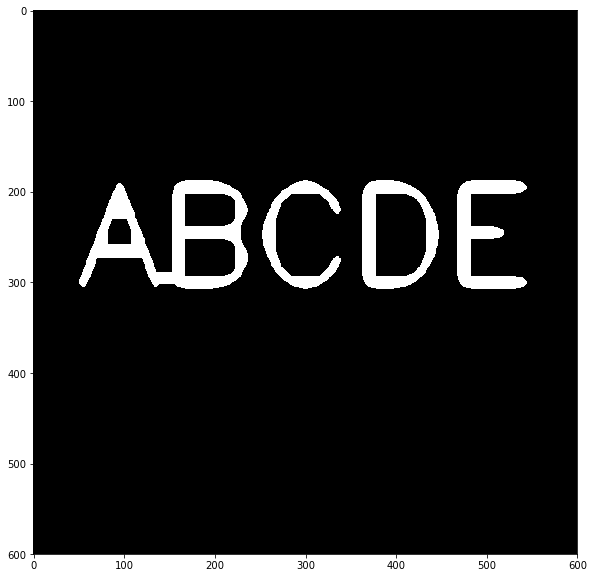

In [9]:
display_img(kerneled_image)

In [10]:
######################
## Expansion Effect ##
######################

In [11]:
image = load_img()

In [12]:
white_noise = np.random.randint(low = 0, high = 2, size = (600, 600))

In [13]:
print(white_noise.shape, white_noise)

(600, 600) [[1 1 0 ... 1 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [1 1 1 ... 1 0 1]
 [1 1 0 ... 1 1 0]]


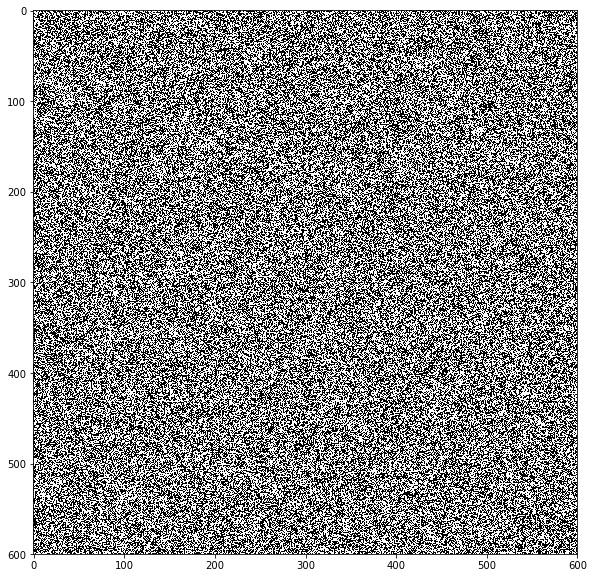

In [14]:
display_img(white_noise)

In [15]:
print(image.max())

255.0


In [16]:
white_noise = white_noise * 255

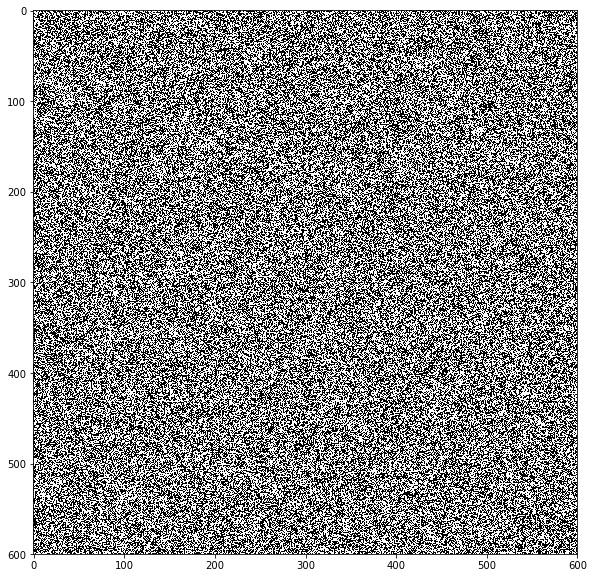

In [17]:
display_img(white_noise)

In [18]:
noise_image = white_noise + image

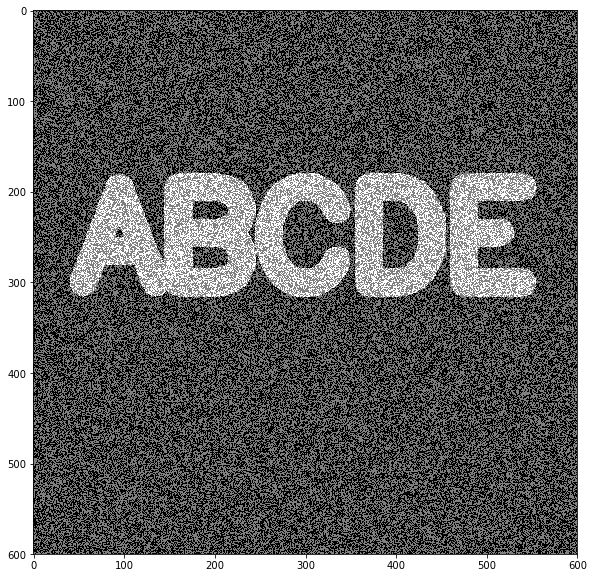

In [19]:
display_img(noise_image)

In [20]:
opening = cv2.morphologyEx(
    noise_image,
    cv2.MORPH_OPEN,
    image_kernel
)

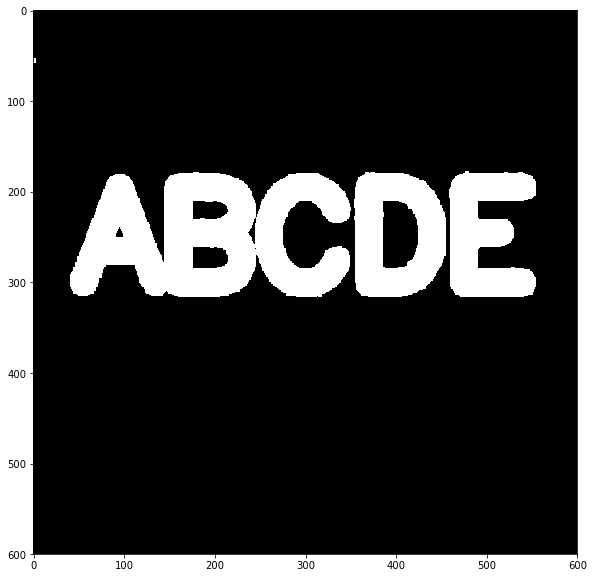

In [21]:
display_img(opening)

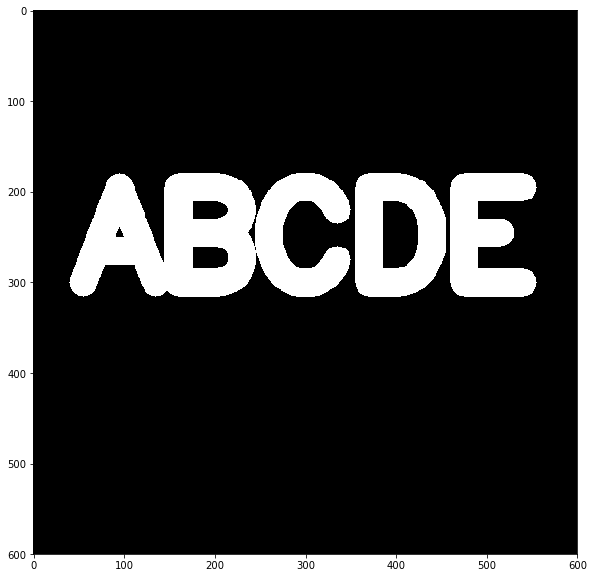

In [22]:
display_img(image)

In [23]:
################################
## Expansion Effect (2nd Try) ##
################################

In [24]:
image = load_img()

In [25]:
blank_noise = np.random.randint(low = 0, high = 2, size = (600, 600))

In [26]:
blank_noise = blank_noise * -255

In [27]:
print(blank_noise.shape, blank_noise)

(600, 600) [[   0    0    0 ... -255 -255 -255]
 [   0 -255 -255 ...    0    0 -255]
 [-255    0    0 ...    0    0 -255]
 ...
 [-255 -255    0 ...    0    0 -255]
 [   0 -255 -255 ...    0    0    0]
 [   0 -255    0 ... -255    0 -255]]


In [28]:
blank_noise_image = image + blank_noise

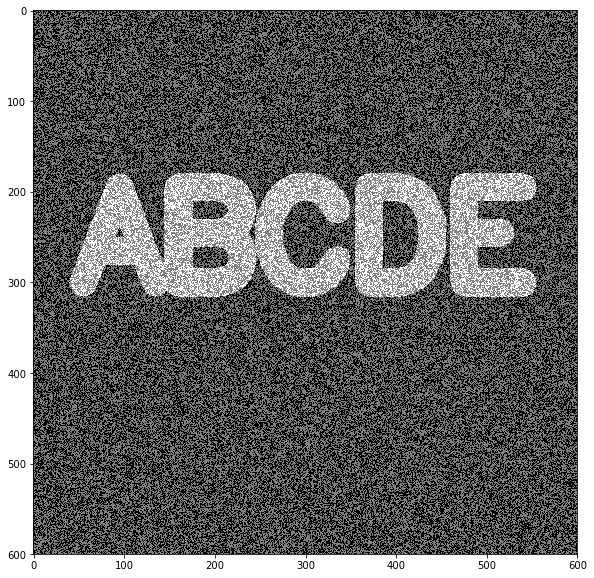

In [29]:
display_img(blank_noise_image)

In [30]:
blank_noise_image[blank_noise_image == -255] = 0

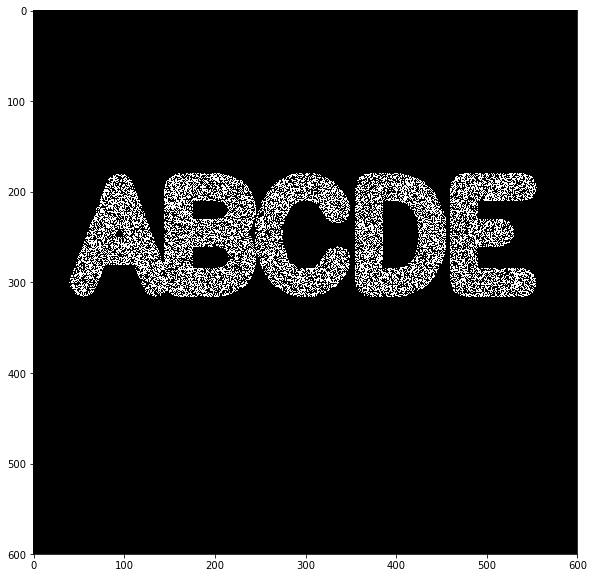

In [31]:
display_img(blank_noise_image)

In [32]:
closing = cv2.morphologyEx(blank_noise_image, cv2.MORPH_CLOSE, image_kernel)

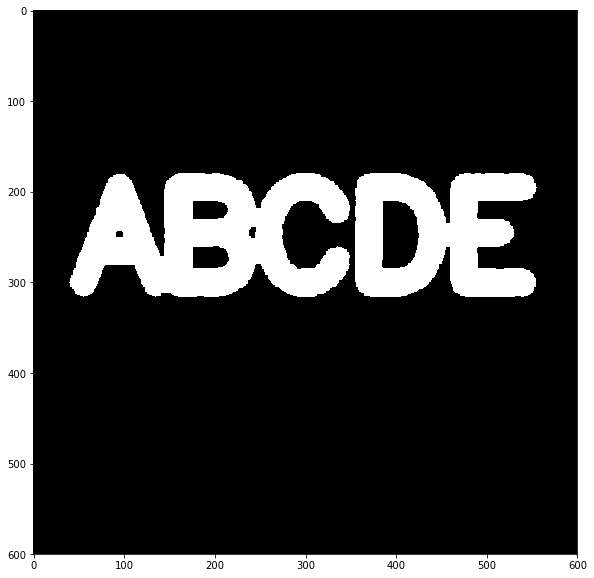

In [33]:
display_img(closing)

In [34]:
########################################################################
## Morphological Gradient take different between Dilation and Erosion ##
########################################################################

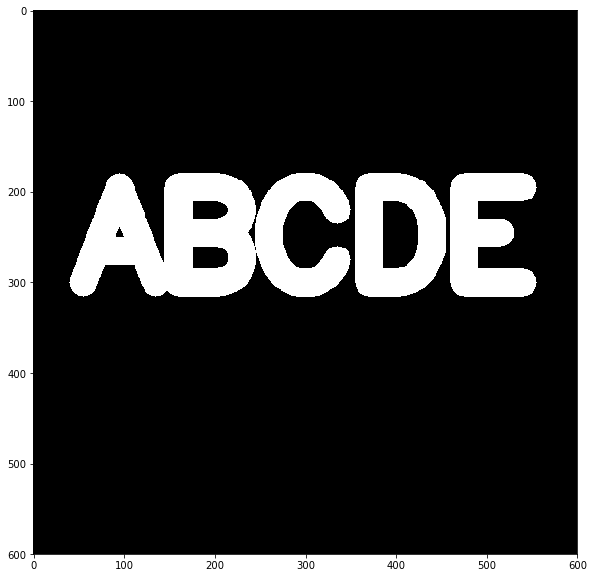

In [38]:
image = load_img()
display_img(image)

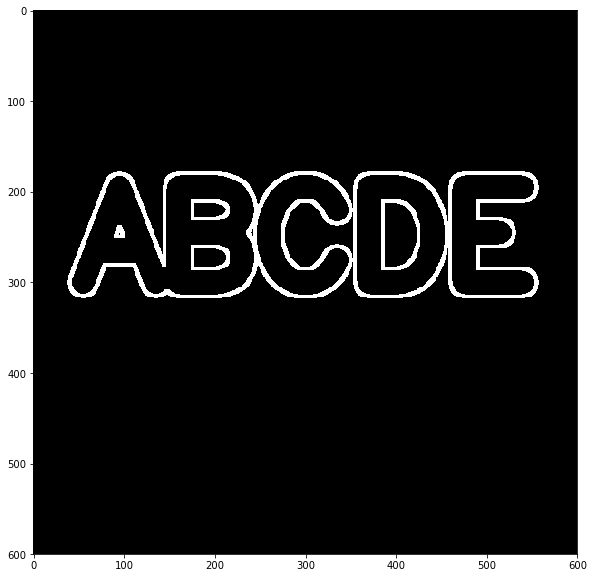

In [39]:
gradient_image = cv2.morphologyEx(
    image,
    cv2.MORPH_GRADIENT,
    image_kernel
)
display_img(gradient_image)